### DATA CLEANING

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df['Title'] = df['Name'].str.extract(r',\s*([^.]*)\.', expand=False).str.strip()

# Map rare titles to 'Rare' and standardize common ones
title_mapping = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Lady': 'Rare', 'Countess': 'Rare', 'Capt': 'Rare', 'Col': 'Rare', 
    'Don': 'Rare', 'Dr': 'Rare', 'Major': 'Rare', 'Rev': 'Rare', 
    'Sir': 'Rare', 'Jonkheer': 'Rare', 'Dona': 'Rare'
}
df['Title'] = df['Title'].replace(title_mapping)

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [10]:
age_median_by_title = df.groupby('Title')['Age'].median()

def impute_age(row):
    if pd.isna(row['Age']):
        title = row['Title']
        return age_median_by_title.get(title, df['Age'].median())
    return row['Age']

df['Age'] = df.apply(impute_age, axis=1)

In [11]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
df['Sex_enc'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)
df['Embarked_enc'], _ = pd.factorize(df['Embarked'])

In [13]:
df['Deck'] = df['Cabin'].astype(str).str[0]
df.loc[df['Cabin'].isna(), 'Deck'] = 'U'  # U = Unknown
df['HasCabin'] = (~df['Cabin'].isna()).astype(int)

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df['Title_enc'], _ = pd.factorize(df['Title'])
df['Deck_enc'], _ = pd.factorize(df['Deck'])

# Selecting relevant columns for modeling
selected_cols = [
    'PassengerId', 'Survived', 'Pclass', 'Sex_enc', 'Age', 'SibSp', 'Parch',
    'Fare', 'Embarked_enc', 'Title_enc', 'Deck_enc', 'HasCabin',
    'FamilySize', 'IsAlone'
]
processed_df = df[selected_cols].copy()

In [14]:
processed_df.to_csv("titanic_cleaned.csv", index=False)
print("Cleaned dataset saved as 'titanic_cleaned.csv'")

Cleaned dataset saved as 'titanic_cleaned.csv'


### TESTING FOR BEST PREDICTION MODEL

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [16]:
from xgboost import XGBClassifier

#Loading cleaned dataset
df1 = pd.read_csv("titanic_cleaned.csv")

#Spliting into features and target
X = df1.drop(columns=['PassengerId', 'Survived'])
y = df1['Survived']


In [17]:
#Spliting dataset into Training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
#Defining Classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


In [19]:
#Training & evaluating models for best Model
results = []
for name, model in models.items():
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    #Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1, 4),
        "ROC-AUC": round(roc_auc, 4)
    })


c:\Users\Srikanth Pydikalva\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:30:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [20]:
#Converting results to DataFrame
results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)
print("\nModel Evaluation Summary:\n")
print(results_df)

#Selecting Best Model and Displaying classification report for best model
best_model_name = results_df.iloc[0]['Model']
print(f"\nBest Model: {best_model_name}")
best_model = models[best_model_name]

if best_model_name in ["Logistic Regression", "SVM"]:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Model Evaluation Summary:

                 Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
2                  SVM    0.8212     0.8033  0.7101    0.7538   0.8603
0  Logistic Regression    0.8045     0.7742  0.6957    0.7328   0.8534
3              XGBoost    0.7933     0.7424  0.7101    0.7259   0.8357
1        Random Forest    0.7821     0.7206  0.7101    0.7153   0.8254

Best Model: SVM

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.80      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



### Visualizing the Outliers in Boxplots

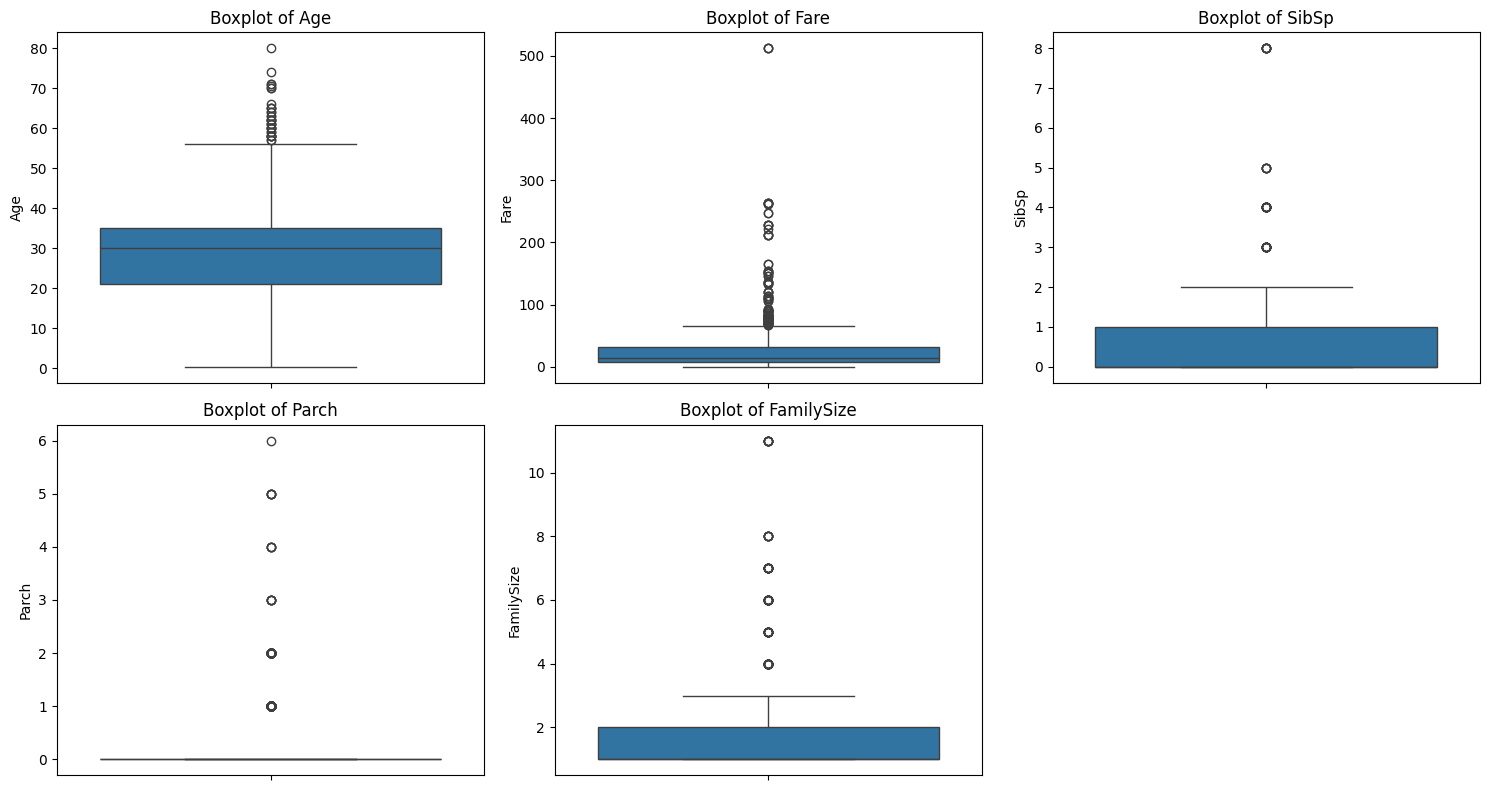

In [21]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']

#Visualizing boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df1[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

#Removing outliers using IQR method
def remove_outliers(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]

